# Pymaceuticals Inc.


### Analysis

# Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results,mouse_metadata, on ="Mouse ID",how ="left")

# Display the data table for preview
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
merged_df["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_df[merged_df.duplicated(['Mouse ID','Timepoint'])]['Mouse ID'].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_rows=merged_df[merged_df.duplicated(subset=["Mouse ID","Timepoint"], keep =False)]
duplicated_mouse_ids = duplicate_rows["Mouse ID"].unique()
data_for_duplicated_mice=merged_df[merged_df["Mouse ID"].isin(duplicated_mouse_ids)]
data_for_duplicated_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_df[merged_df['Mouse ID']=='g989']


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
clean = merged_df[merged_df['Mouse ID']!='g989']
clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = merged_df[merged_df['Mouse ID']!='g989']
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

grp = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
pd.DataFrame({
    'Mean Tumor Volume': grp.mean(),
    "Median Tumor Volume":grp.median(),
    "Tumor Volume Variance":grp.var(),
    "Tumor Volume Std.Dev":grp.std(),
    "Tumor Volume std.Err":grp.sem()
})

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev,Tumor Volume std.Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
clean_df.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].agg(["mean","median","var","std","sem"])

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

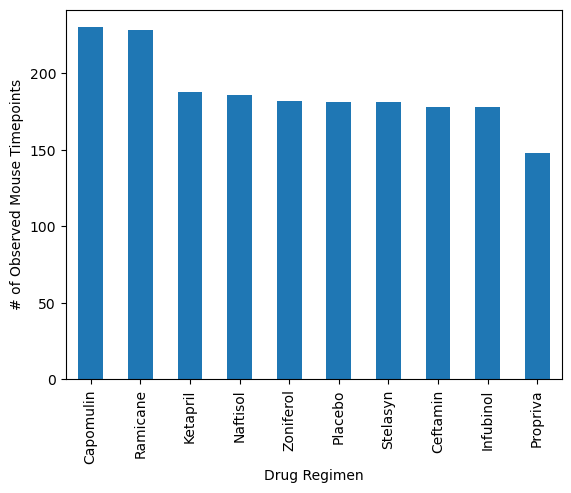

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
clean_df.groupby('Drug Regimen').Timepoint.count().\
    sort_values(ascending=False).plot.bar(ylabel='# of Observed Mouse Timepoints');

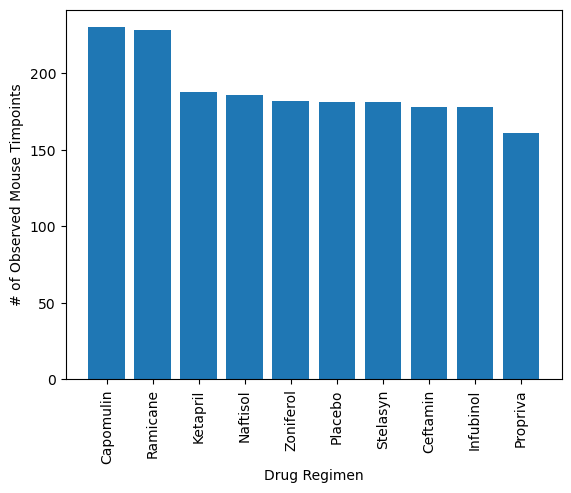

In [12]:
regimen_count = merged_df.groupby("Drug Regimen").Timepoint.count().sort_values(ascending=False)
plt.bar(regimen_count.index,regimen_count)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timpoints")
plt.show()

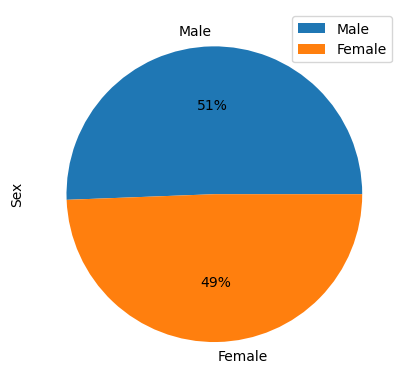

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


data = {"sizes":[958,935],"labels":["Male","Female"]}
df =pd.DataFrame(data)
ax =df.plot.pie(y = "sizes",labels = df["labels"],autopct = "%.0f%%", startangle = 0)
ax.set_ylabel("Sex", rotation =90 )
plt.show()

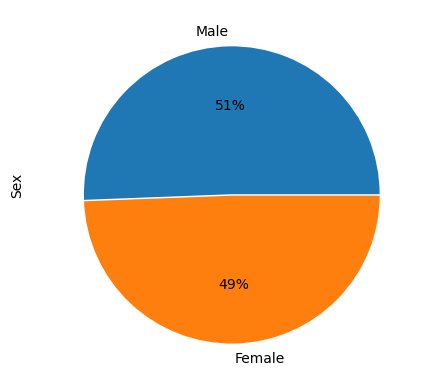

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


labels =["Male","Female"]
z=[958,935]
explode=[0,0.01]

x=merged_df["Sex"].value_counts()
plt.pie(z, explode =explode, labels =labels ,autopct = "%.0f%%" ,startangle =0)
plt.text(-1.5,0,"Sex",rotation = 90)
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
clean_df['Tumor Volume (mm3)'].quantile()

48.933453655

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
 
    # Locate the rows which contain mice on each drug and get the tumor volumes
  
    # add subset 
   
    # Determine outliers using upper and lower bounds

tumor_df = clean_df.groupby('Mouse ID').Timepoint.max().reset_index().merge(clean_df, on=['Mouse ID','Timepoint'])

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


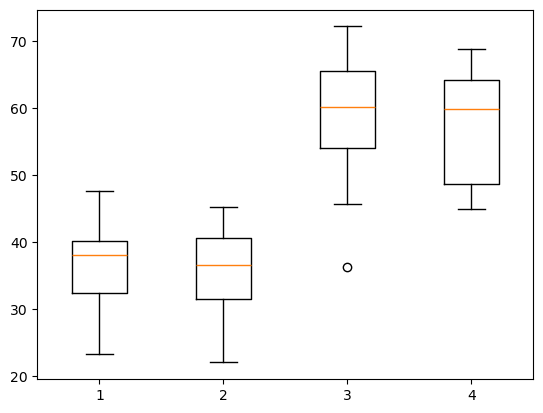

In [17]:
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_list = []

for drug in drugs:
    tumor = tumor_df[tumor_df['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    tumor_list.append(tumor)

    iqr = tumor.quantile(.75) - tumor.quantile(.25)
    upper = tumor.quantile(.75) + 1.5*iqr
    lower = tumor.quantile(.25) - 1.5*iqr

    print(f"{drug}'s potential outliers: {tumor[(tumor<lower)|(tumor>upper)]}")

plt.boxplot(tumor_list);
    

## Line and Scatter Plots

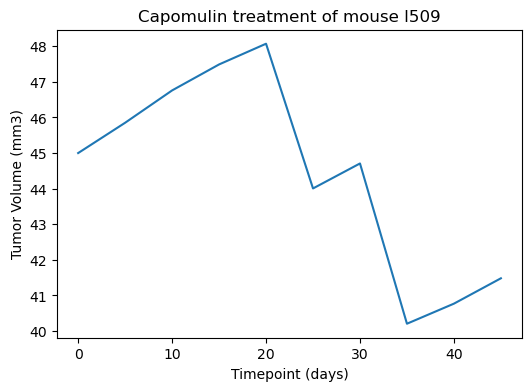

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
merged_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

clean_data = merged_data.drop_duplicates(subset=["Mouse ID", "Timepoint"])
mouse_data = clean_data[clean_data['Mouse ID'] == 'l509']
plt.figure(figsize=(6,4))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])

# Add title and labels to the plot
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()

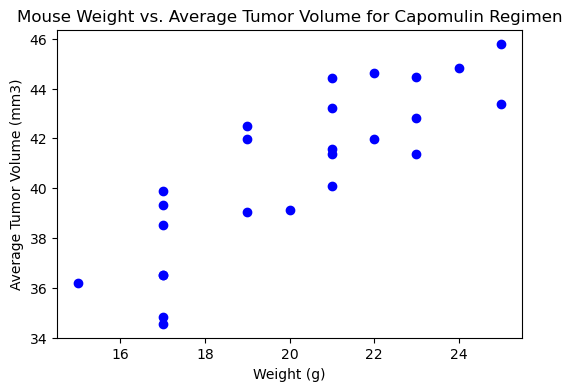

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
merged_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Filter for the Capomulin regimen
capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin']

# Calculate average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID').agg(
    {'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'}).reset_index()

# Plotting the scatter plot
plt.figure(figsize=(6,4))
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'], color='blue')


# Adding labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')

# Showing the plot
plt.show()

## Correlation and Regression

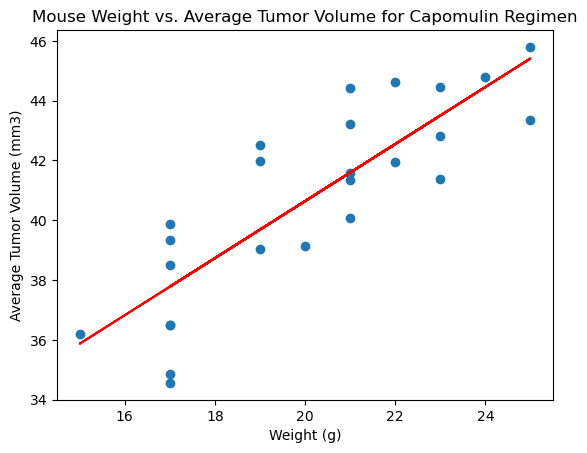

The correlation coefficient is 0.84


In [22]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

from scipy.stats import linregress

# Assuming 'capomulin_data' is your DataFrame containing the Capomulin regimen data
# Group data by mouse ID to get the average tumor volume for each mouse
mouse_grouped = capomulin_data.groupby('Mouse ID').agg(
    avg_tumor_vol=('Tumor Volume (mm3)', 'mean'),
    weight=('Weight (g)', 'mean') # Use 'mean' assuming weight is consistent for each mouse
).reset_index()

# Calculate the correlation coefficient
correlation = mouse_grouped['weight'].corr(mouse_grouped['avg_tumor_vol'])

# Perform linear regression
slope, intercept, r_value, p_value, stderr = linregress(mouse_grouped['weight'], mouse_grouped['avg_tumor_vol'])

# Create a scatter plot of average tumor volume vs. weight
plt.scatter(mouse_grouped['weight'], mouse_grouped['avg_tumor_vol'])

# Add the linear regression line to the scatter plot
regression_values = mouse_grouped['weight'] * slope + intercept
plt.plot(mouse_grouped['weight'], regression_values, "r-")

# Add labels and title to the plot
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')

# Show the plot
plt.show()

# Print the correlation coefficient
print(f"The correlation coefficient is {correlation:.2f}")